# Chicago Crime Type Count Prediction for following Year

## goal: predict the crime type count for following year

In [39]:
import wrangle as w
import pandas as pd
import requests
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sqlalchemy import text, create_engine
from datetime import datetime
import statsmodels.api as sm
from statsmodels.tsa.api import Holt, ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from math import sqrt 
from sklearn.linear_model import LinearRegression


In [2]:
train, validate, test = w.wrangle_crime()





In [3]:
train

Primary Type,THEFT,BATTERY,ASSAULT,CRIMINAL DAMAGE,MOTOR VEHICLE THEFT,NARCOTICS,HOMICIDE,HUMAN TRAFFICKING,OFFENSE INVOLVING CHILDREN,KIDNAPPING
Date,,,,,,,,,,
2018-08-03,176,101,35,46,21,22,1,0,6,1
2018-08-04,241,201,62,87,34,34,4,0,4,0
2018-08-05,223,199,77,97,20,18,8,0,4,2
2018-08-06,215,130,52,74,26,35,3,0,7,0
2018-08-07,232,122,46,69,36,32,2,0,5,0
...,...,...,...,...,...,...,...,...,...,...
2021-07-14,102,102,59,80,27,7,2,0,4,0
2021-07-15,109,106,50,57,18,8,3,0,3,1
2021-07-16,128,117,68,86,35,7,2,0,4,0


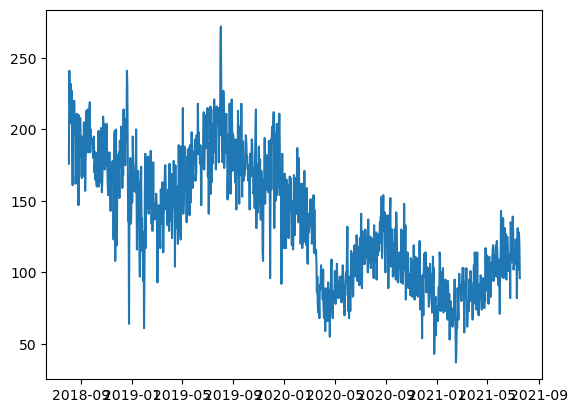

In [4]:
plt.plot(train.index, train.THEFT)


In [5]:
y = train.THEFT

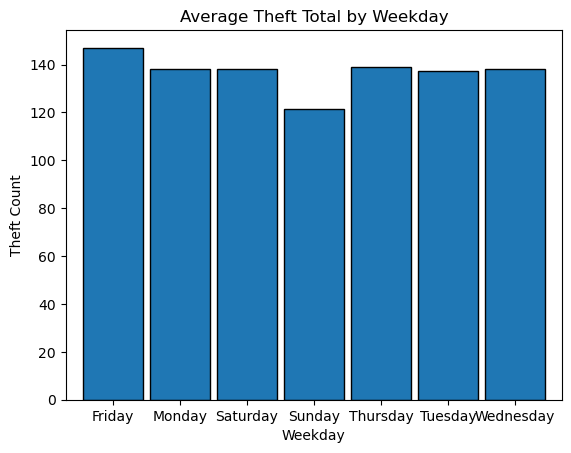

In [6]:
ax = y.groupby(y.index.day_name()).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Theft Total by Weekday', xlabel='Weekday', ylabel='Theft Count')
plt.show()

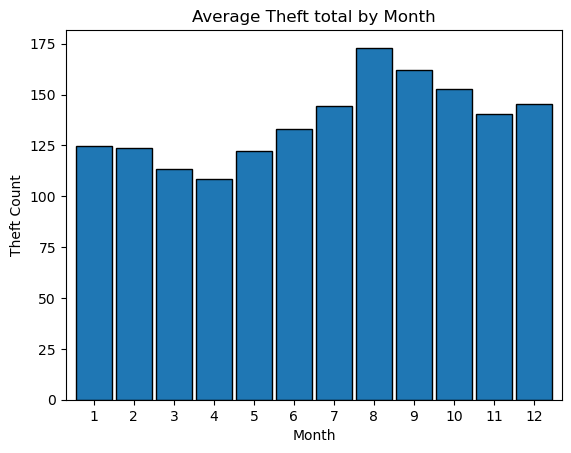

In [7]:
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Theft total by Month', xlabel='Month', ylabel='Theft Count')
plt.show()

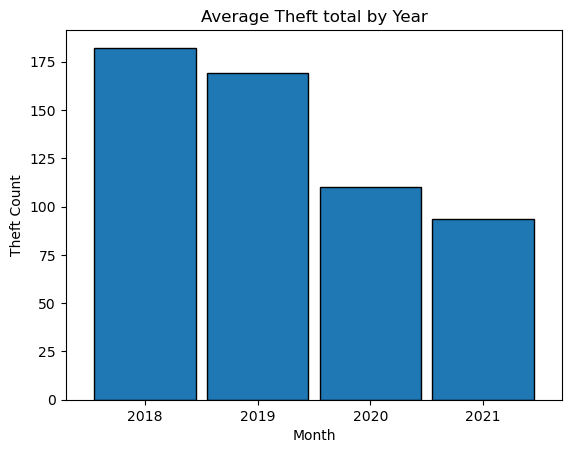

In [8]:
ax = y.groupby(y.index.year).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Theft total by Year', xlabel='Month', ylabel='Theft Count')
plt.show()

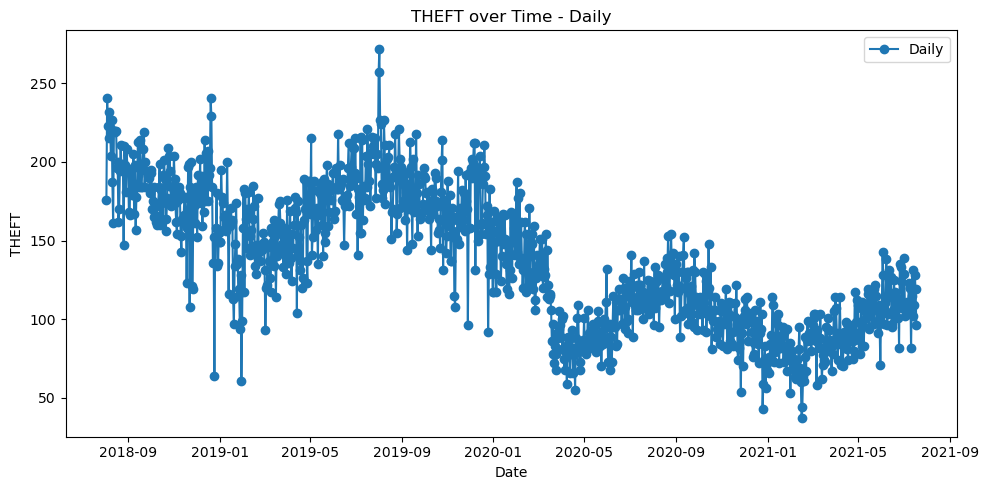

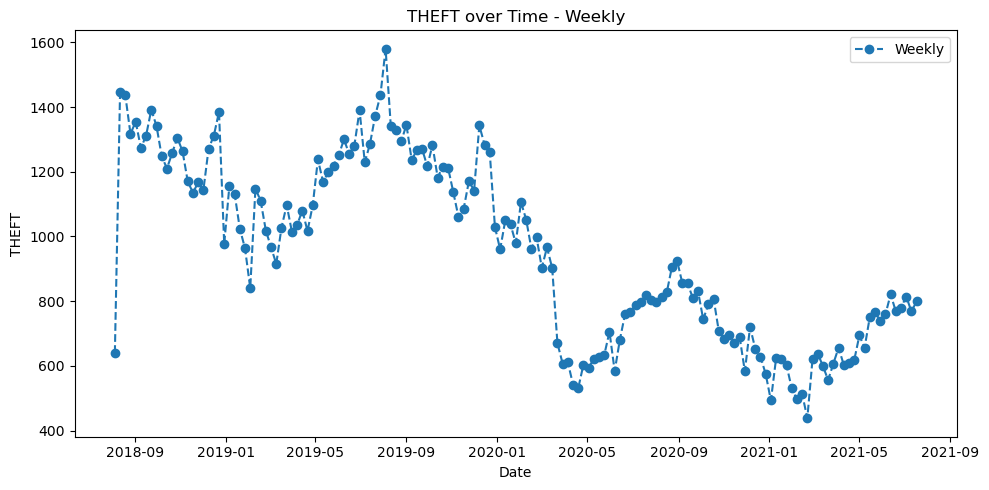

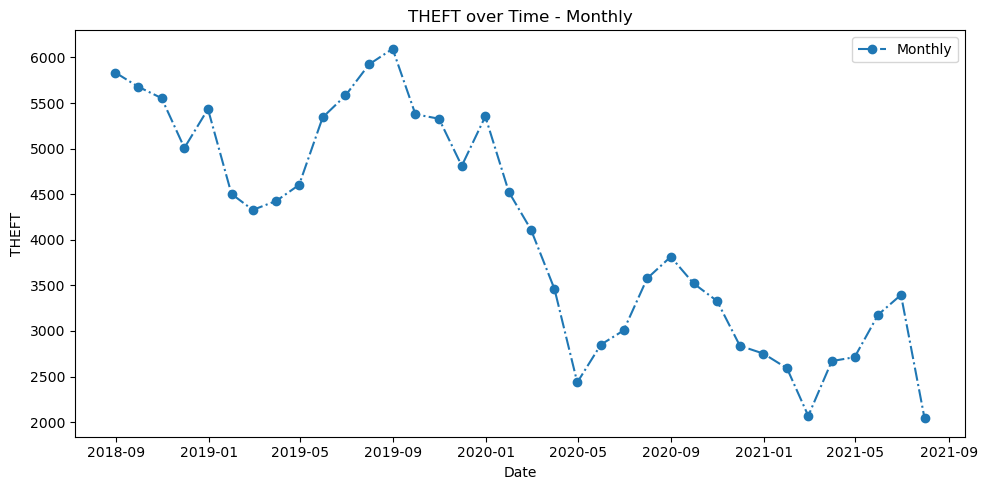

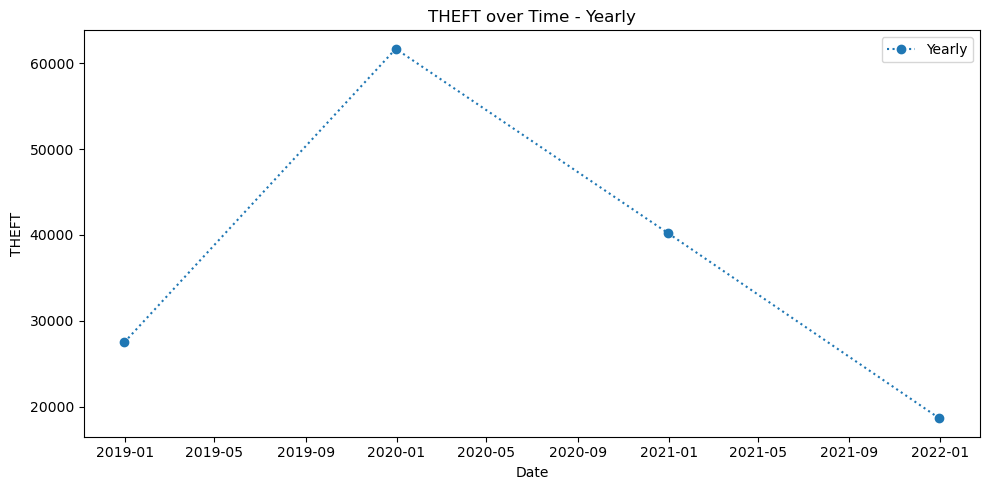

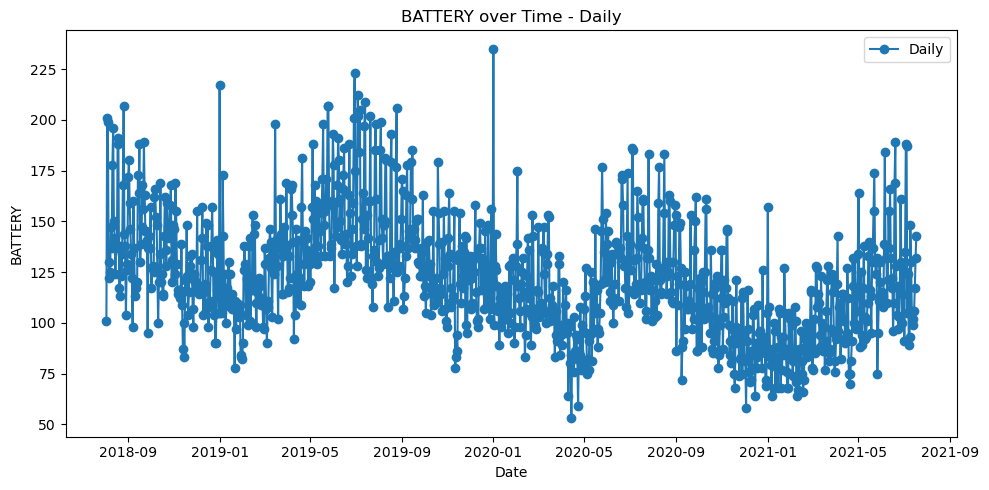

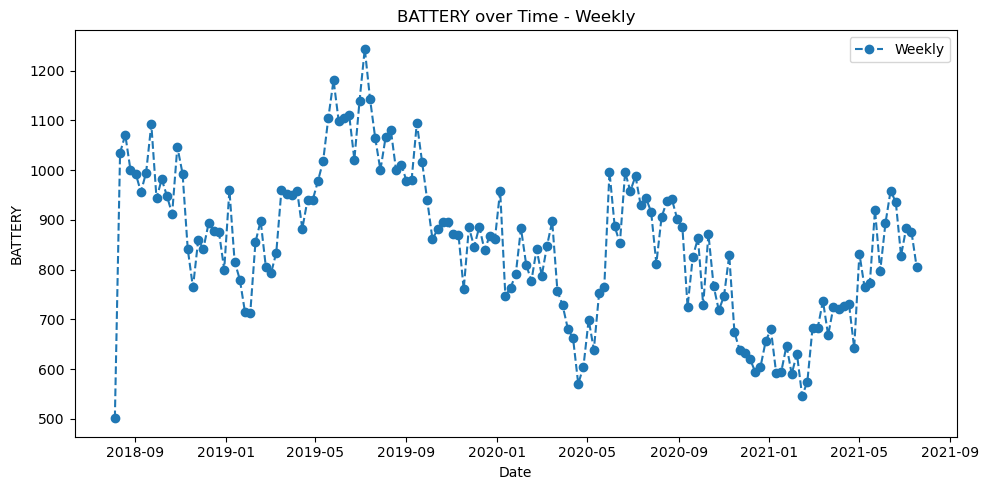

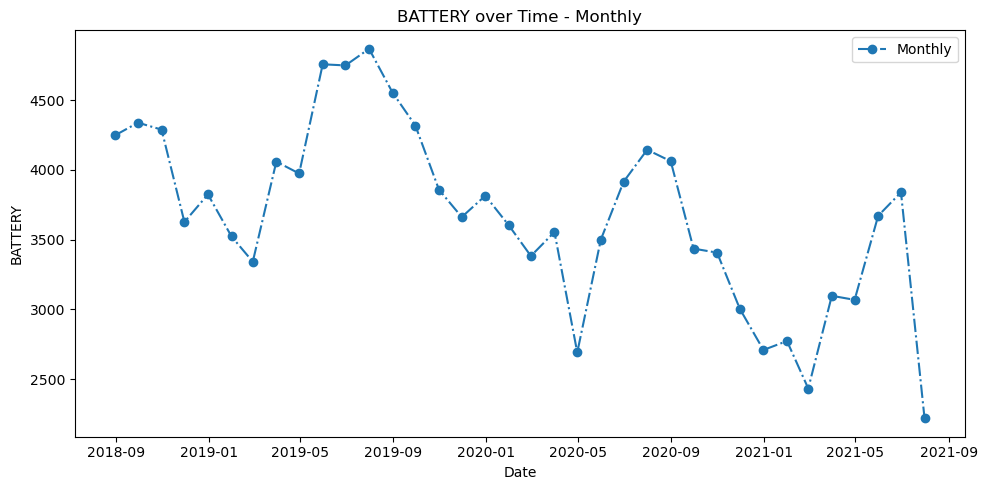

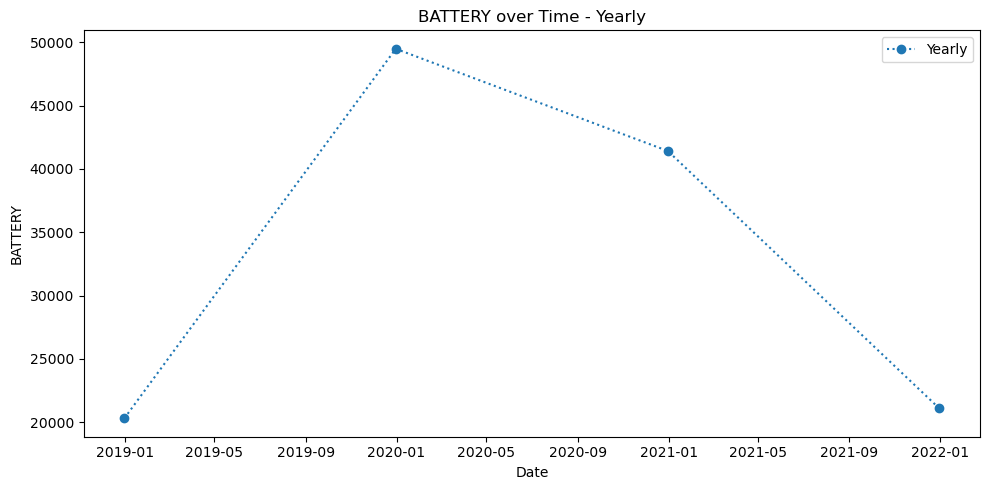

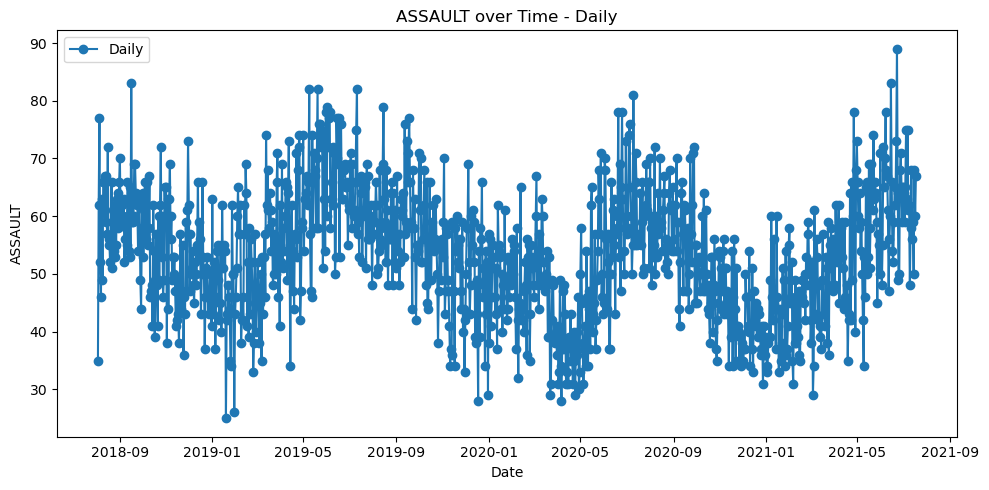

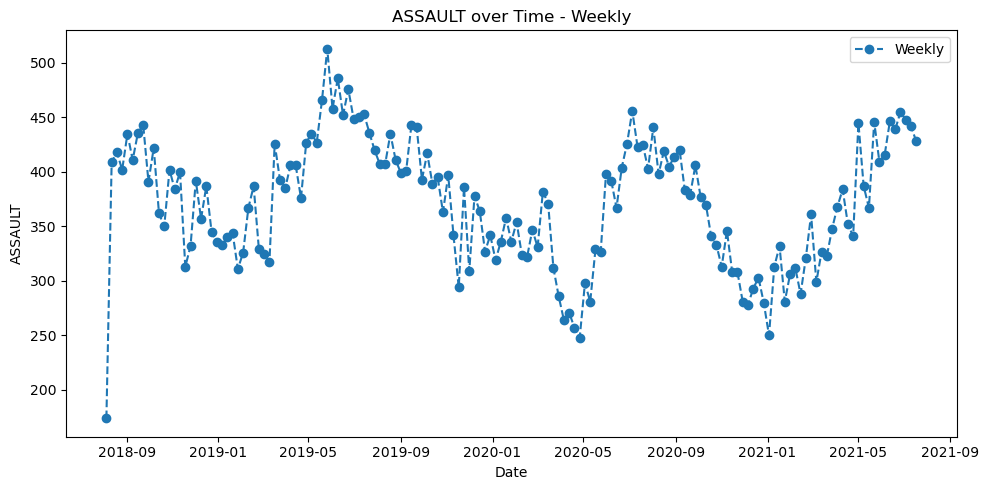

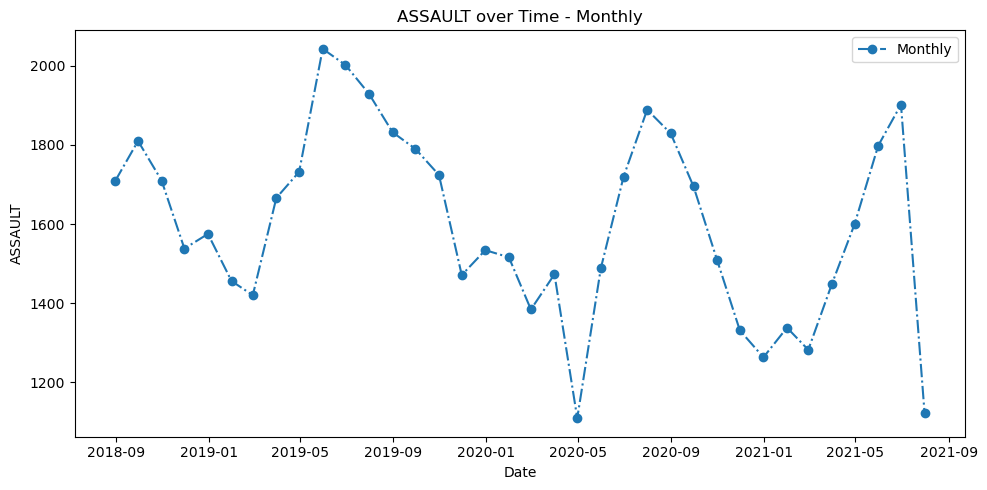

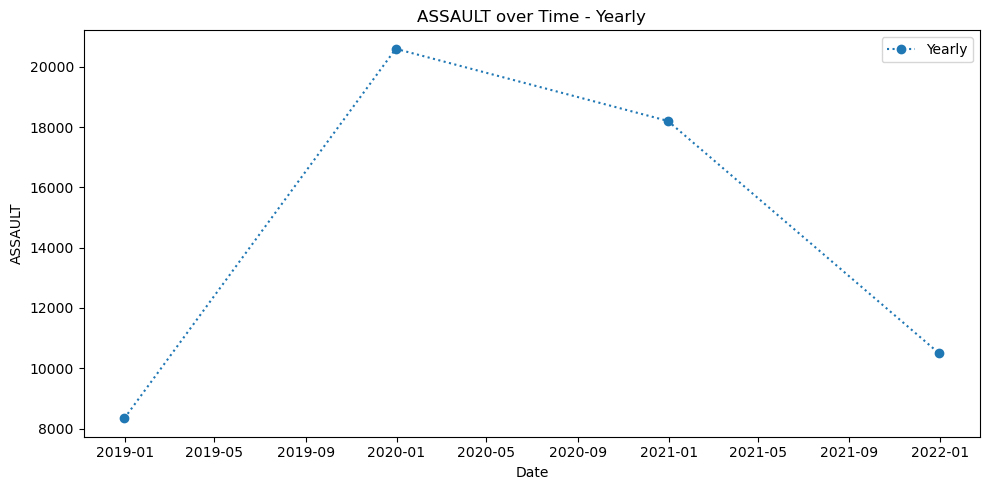

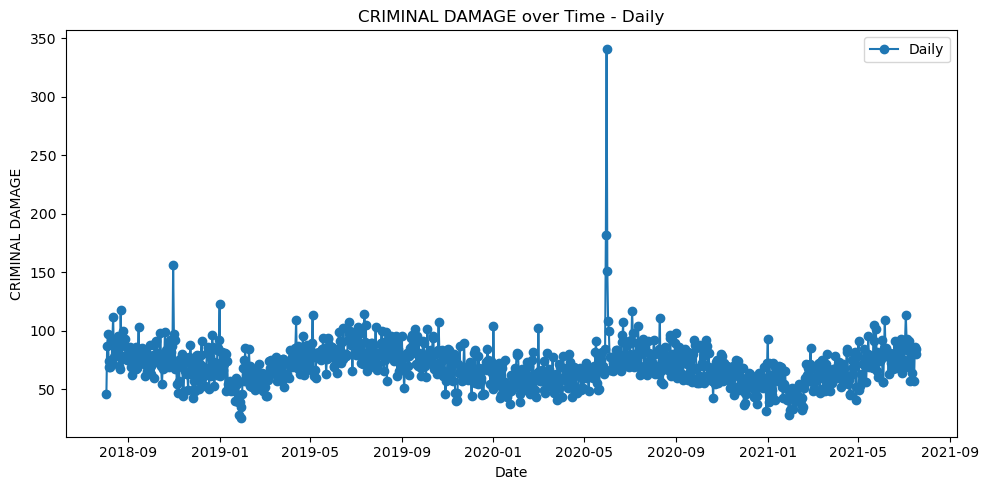

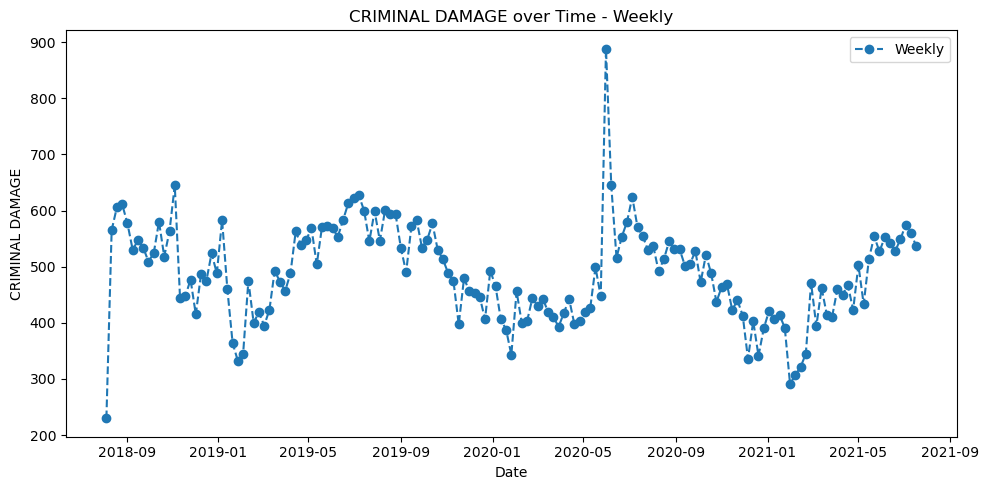

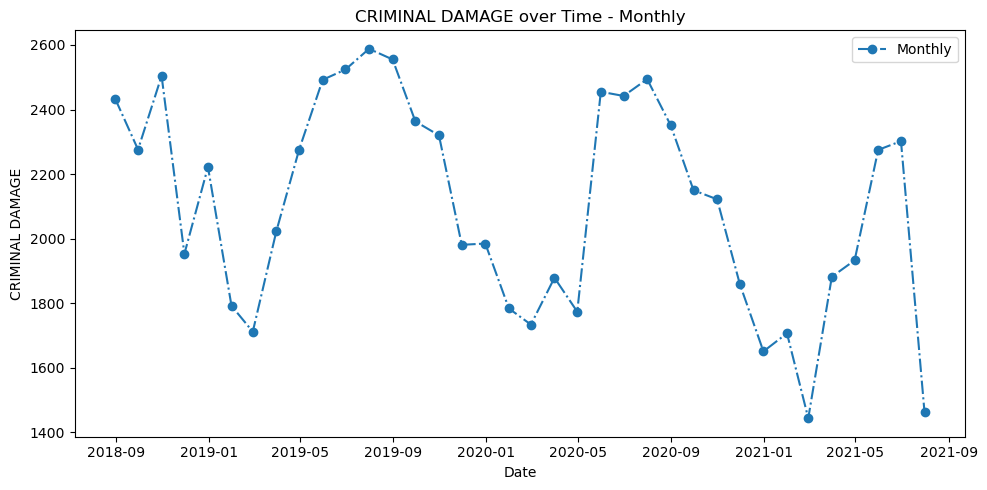

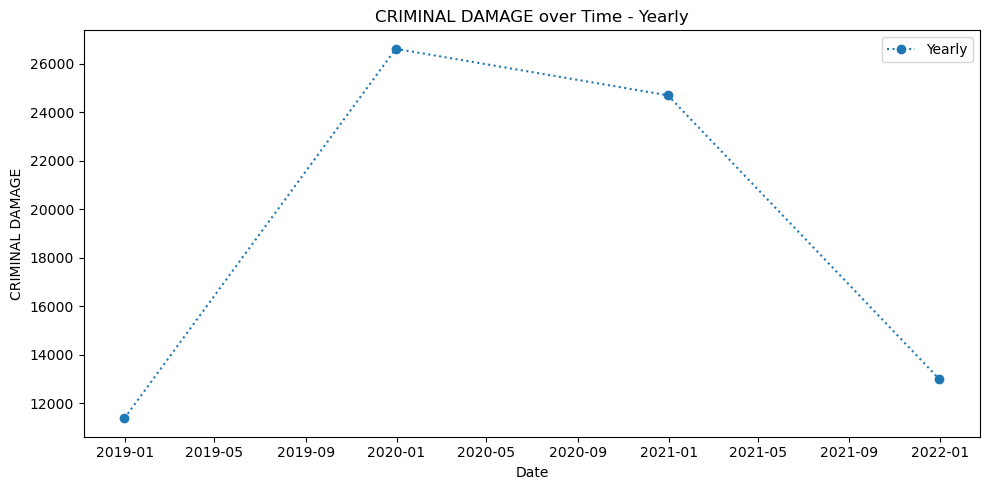

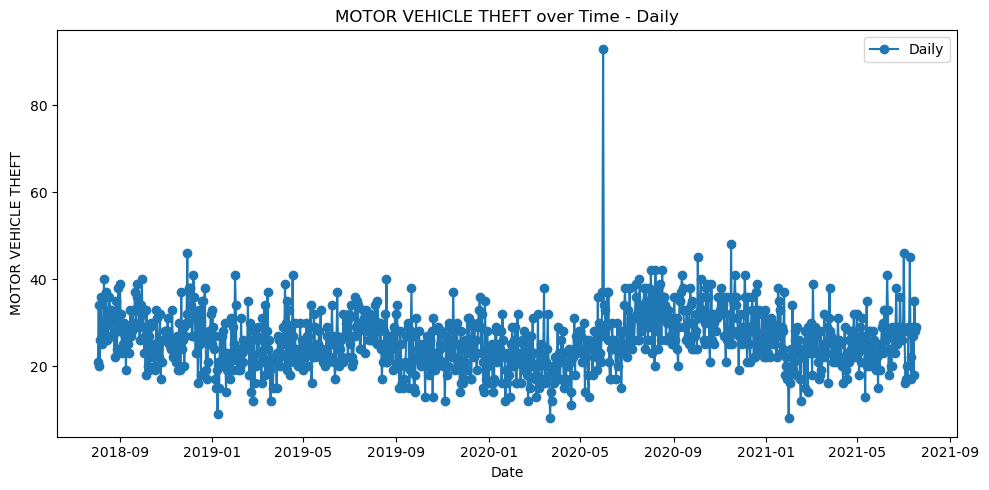

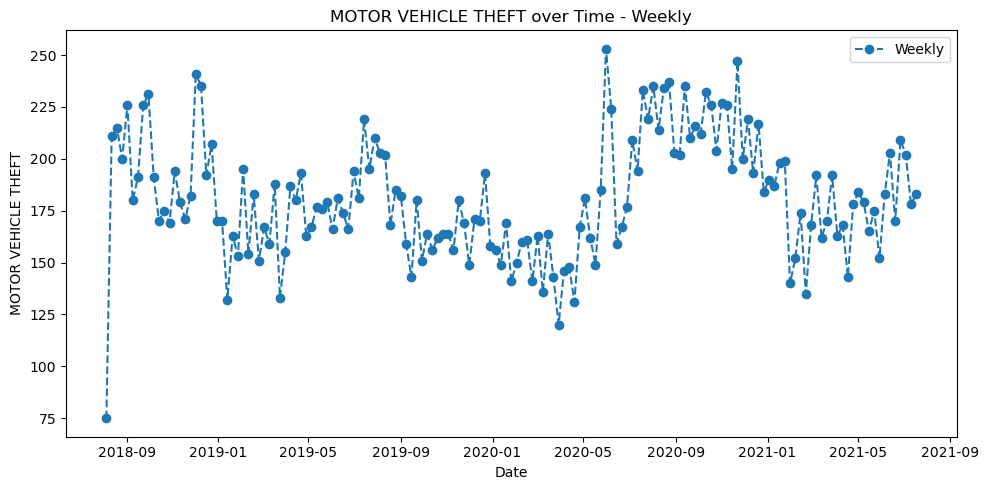

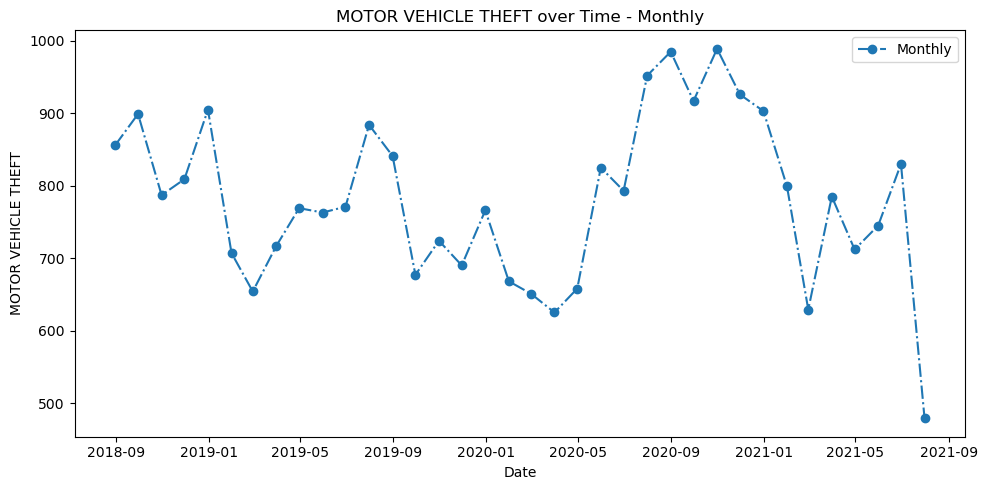

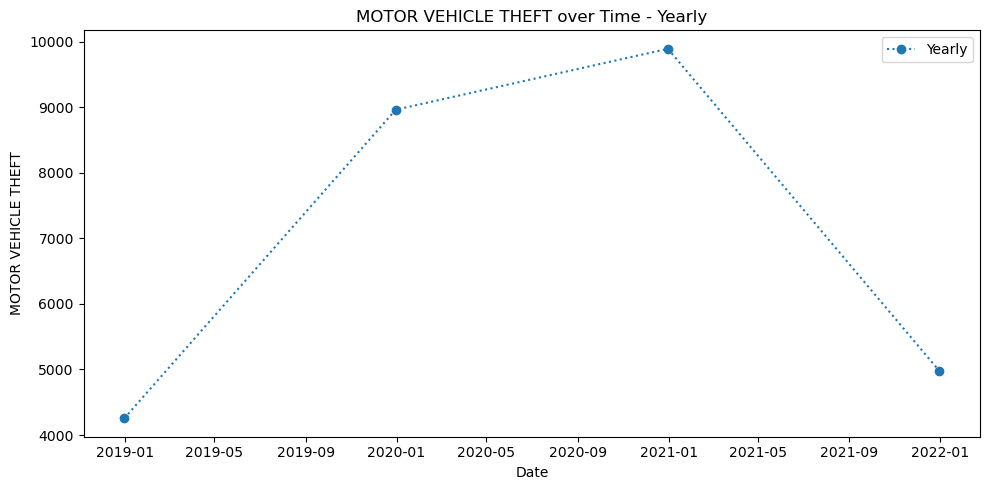

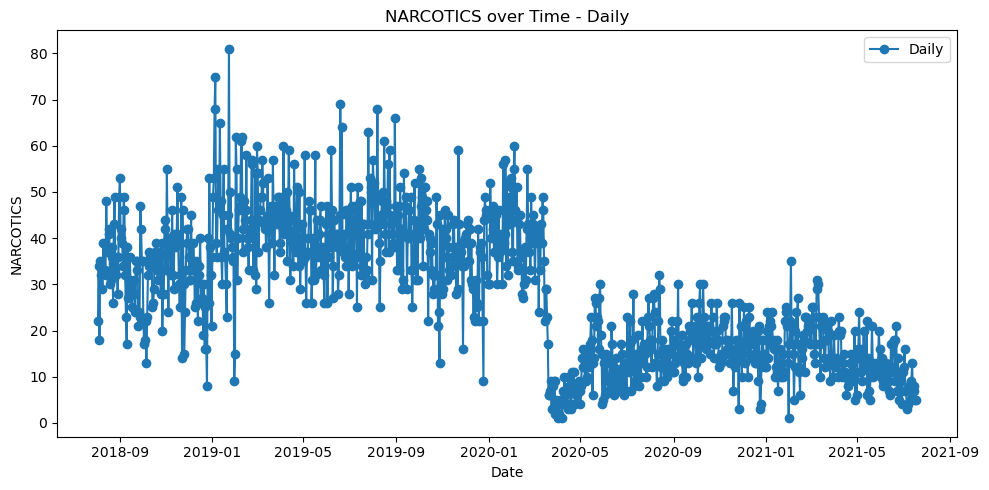

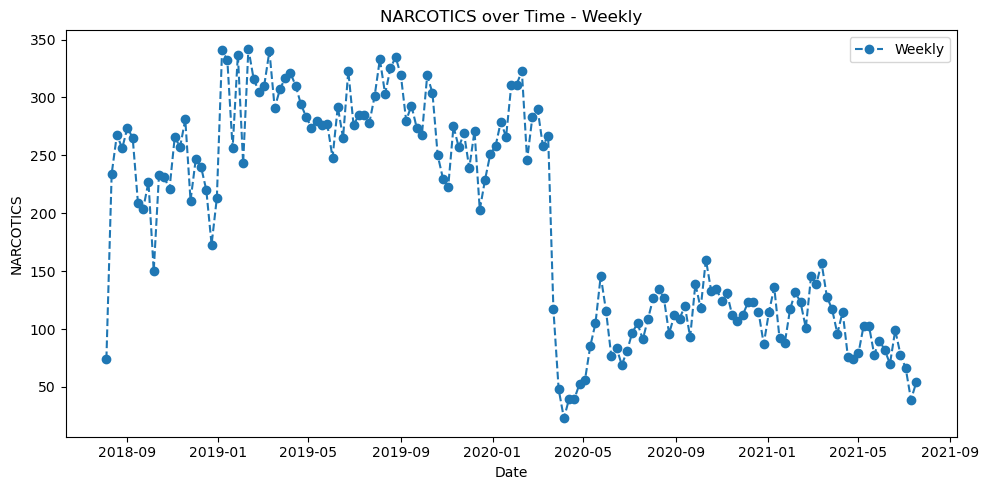

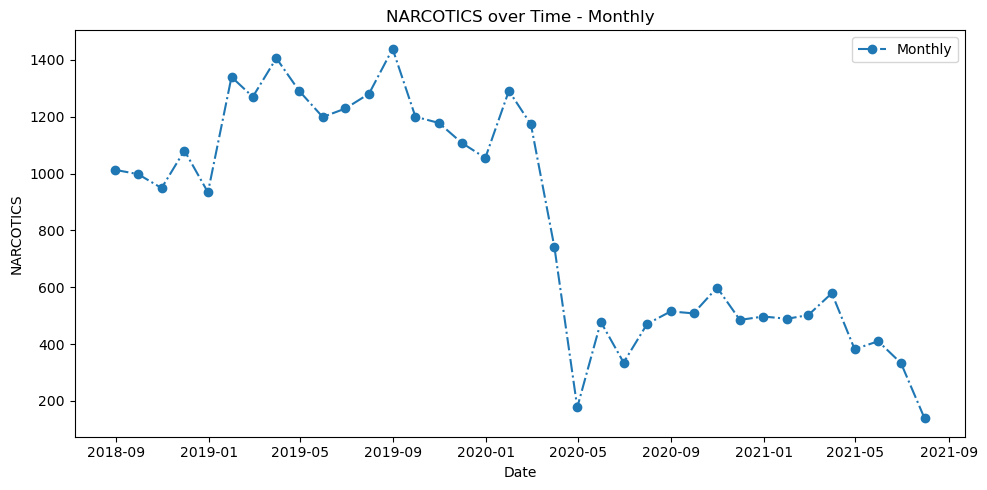

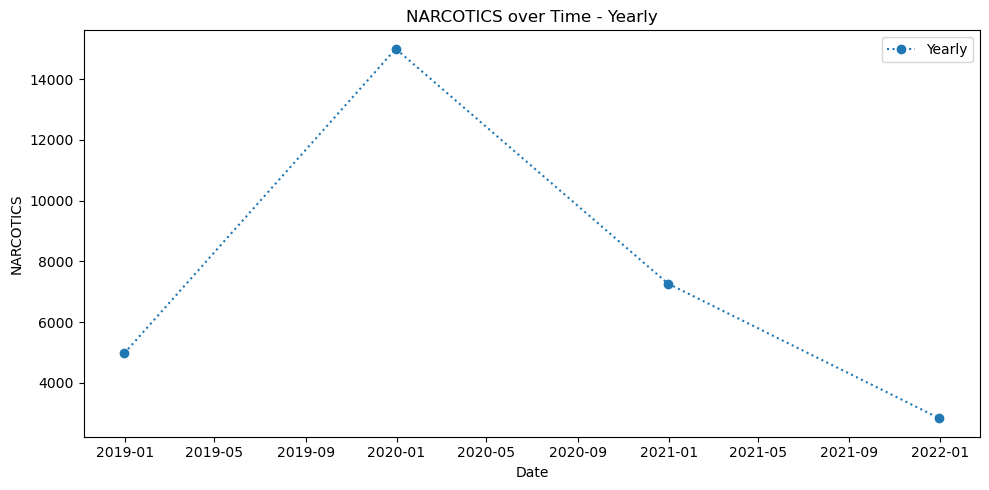

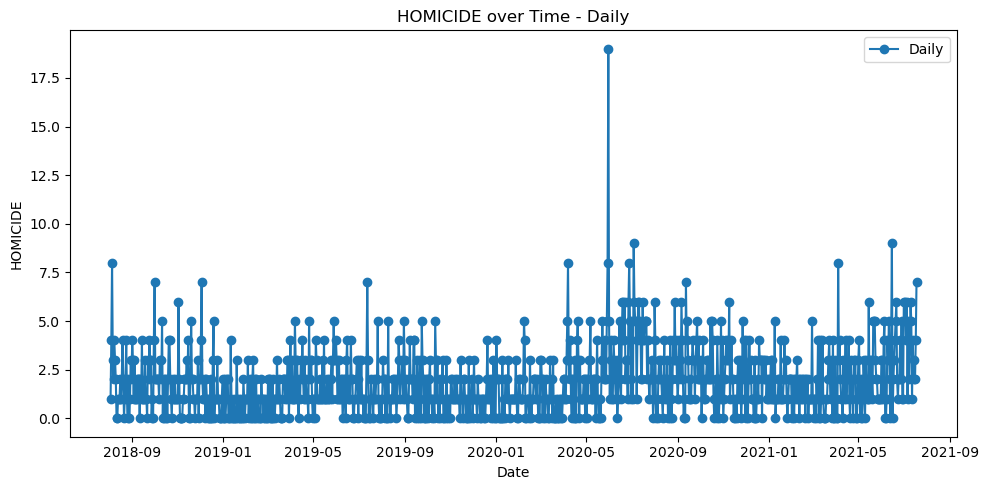

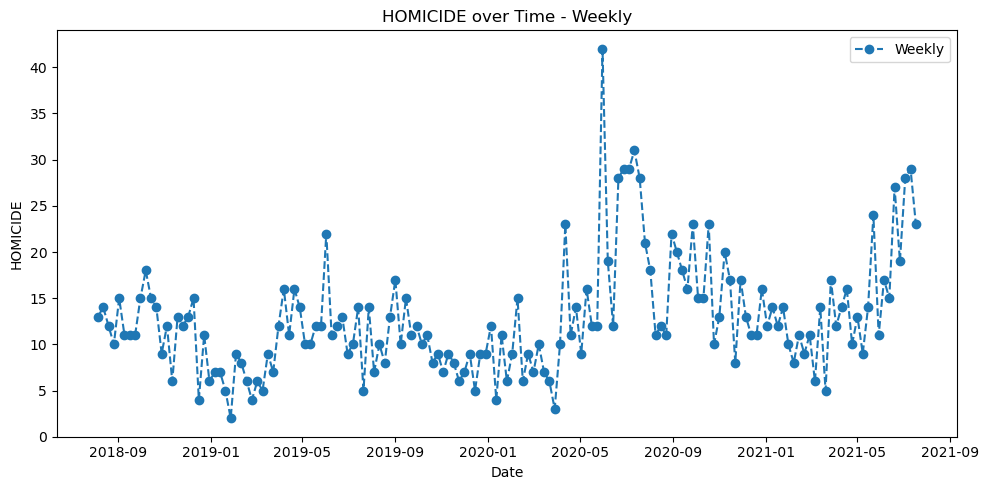

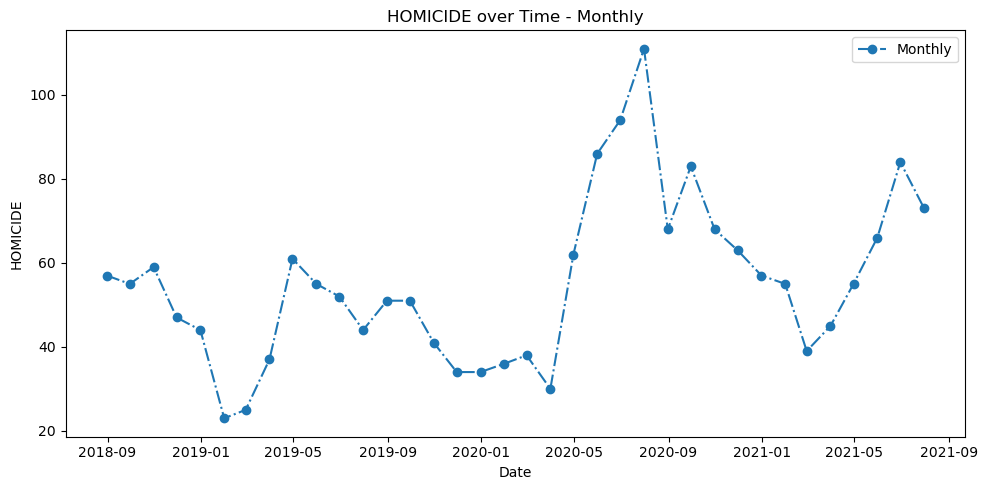

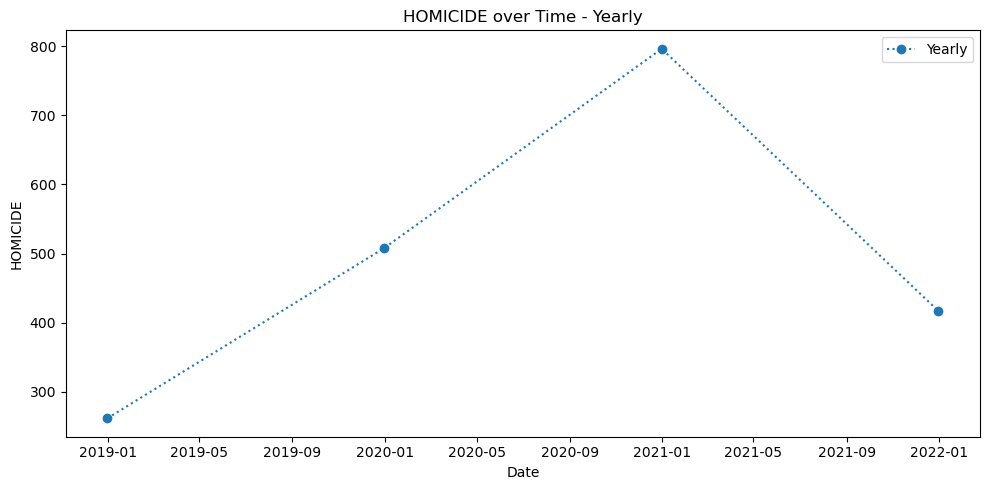

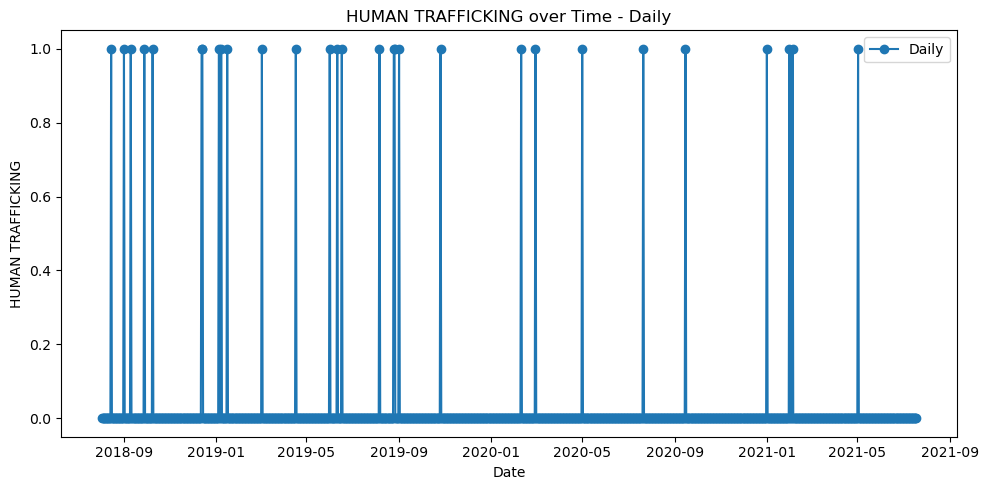

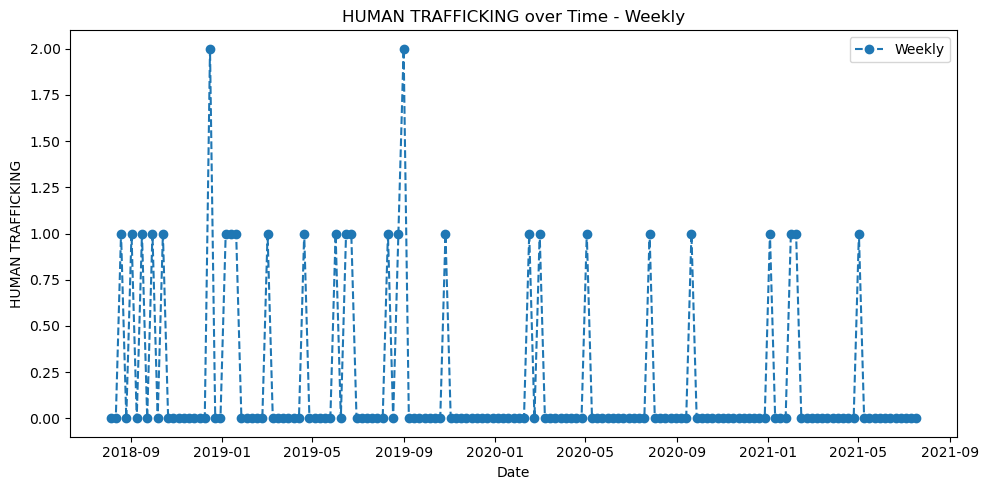

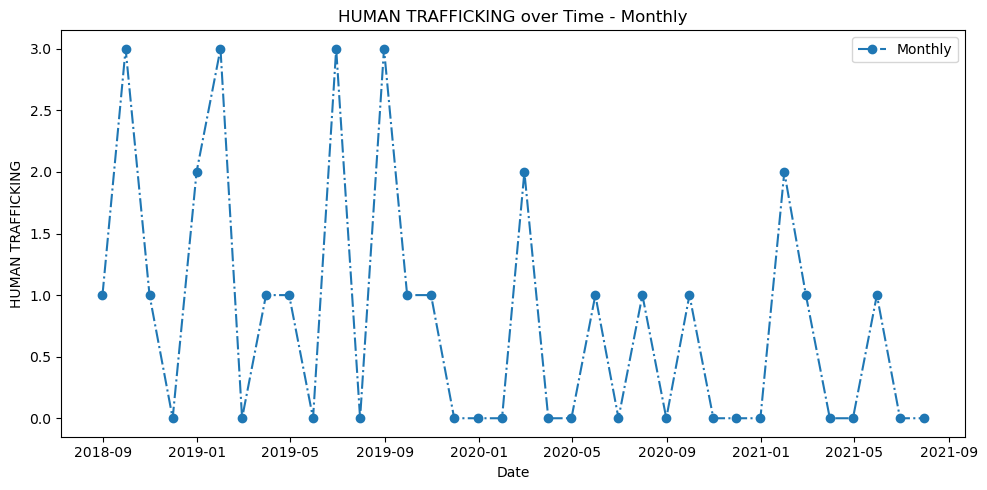

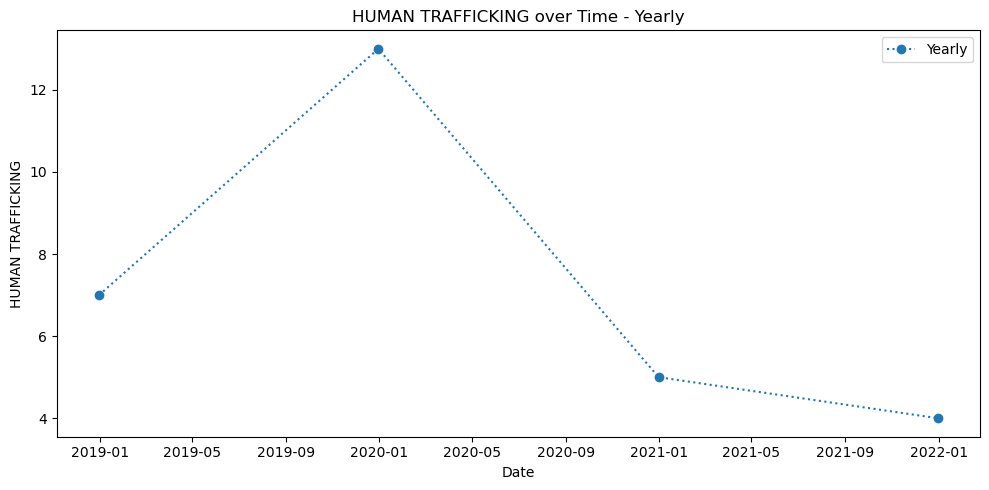

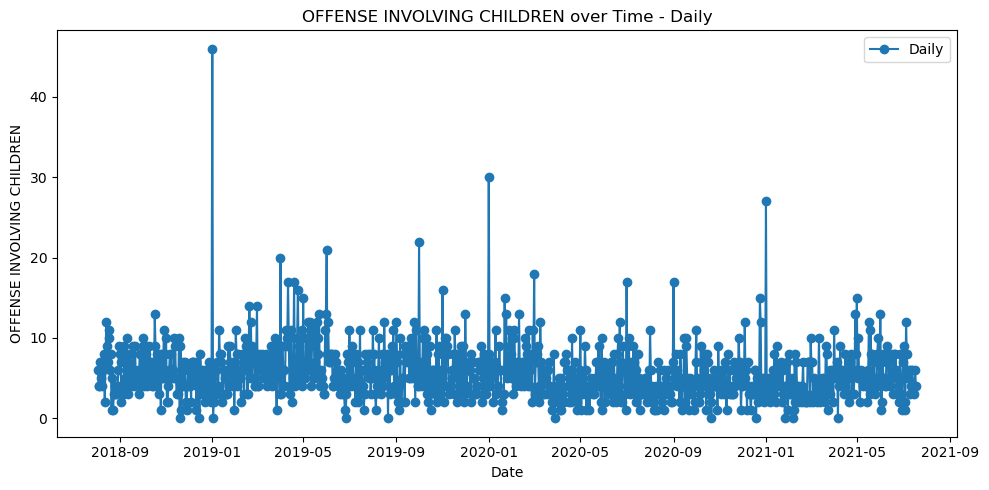

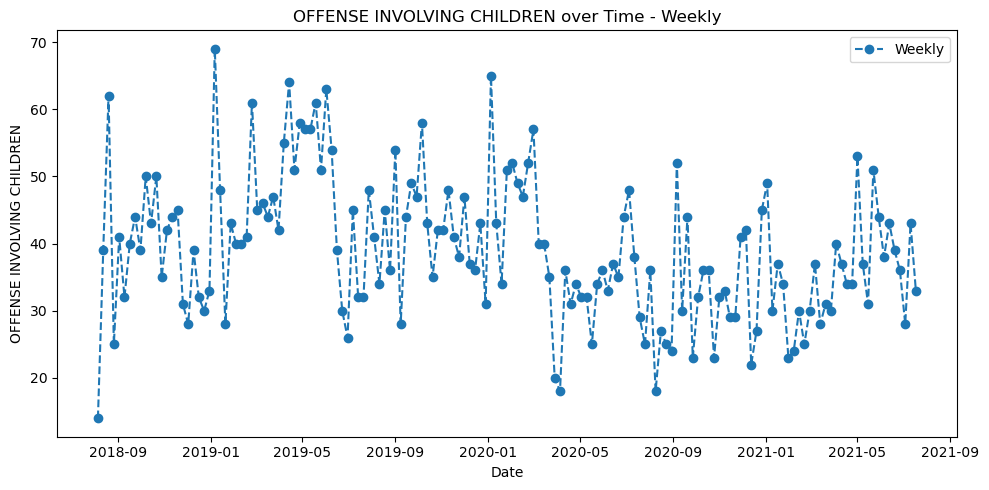

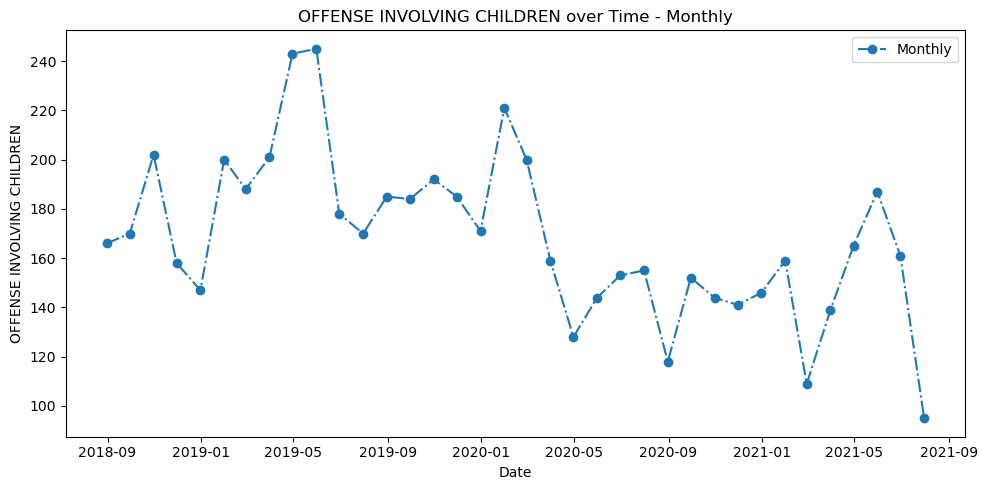

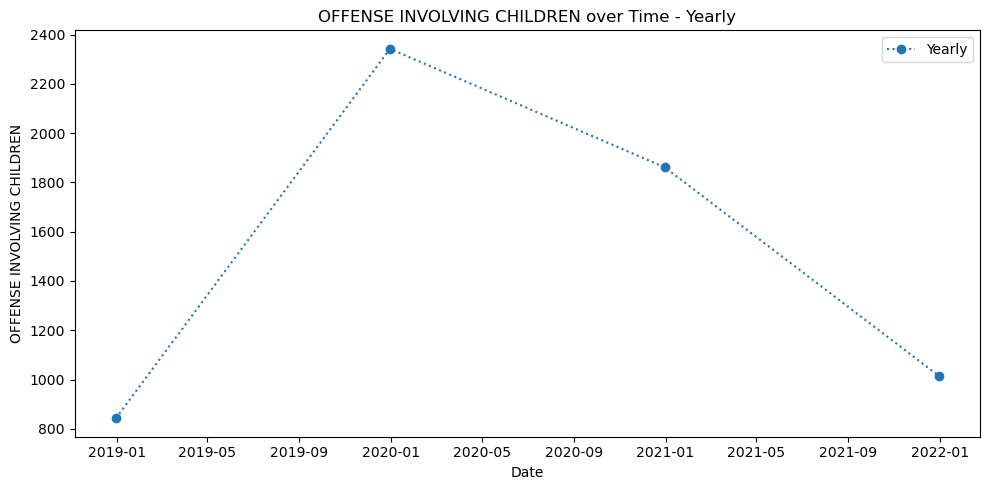

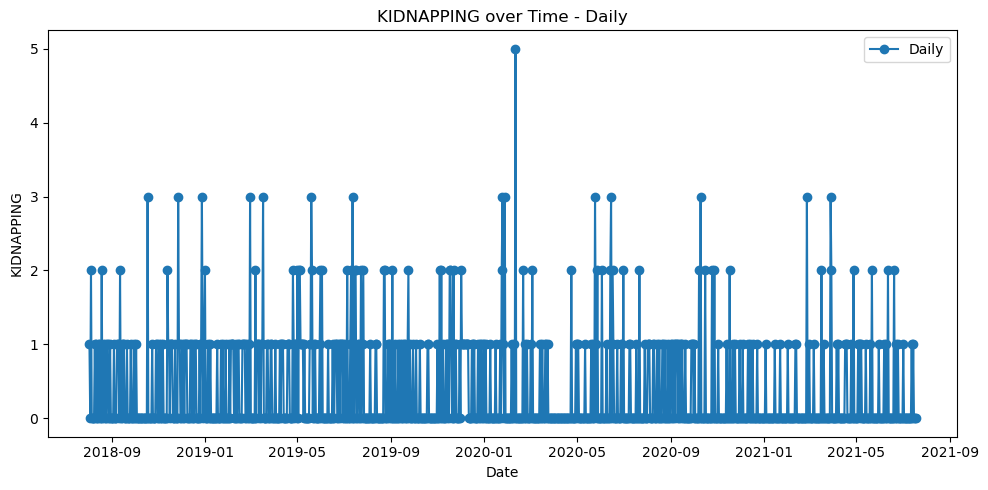

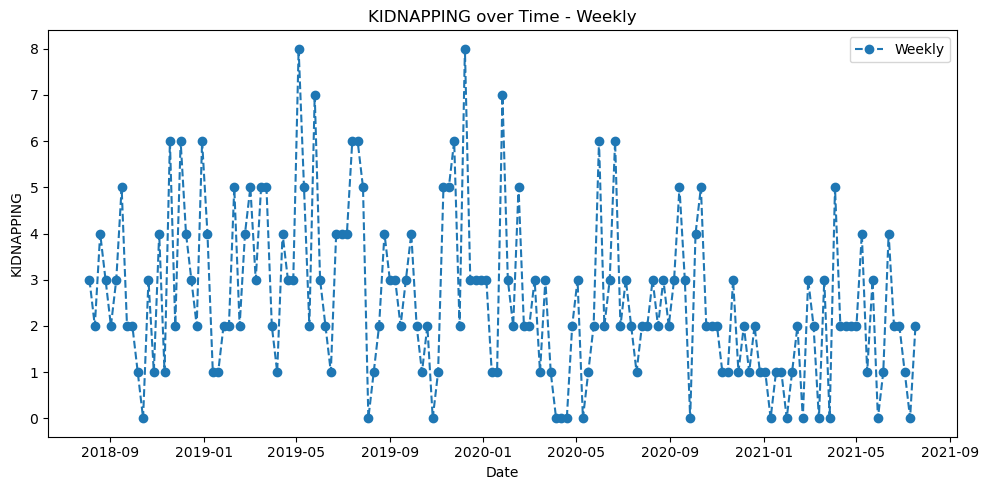

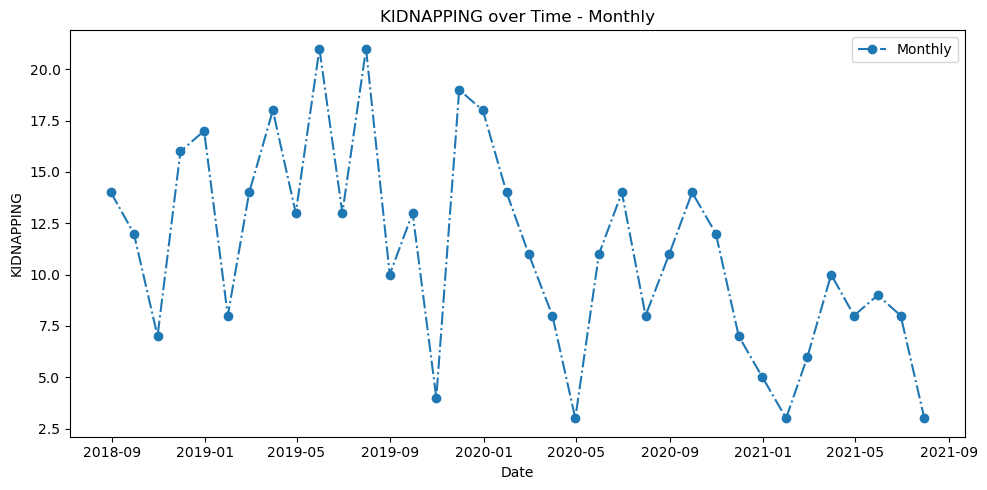

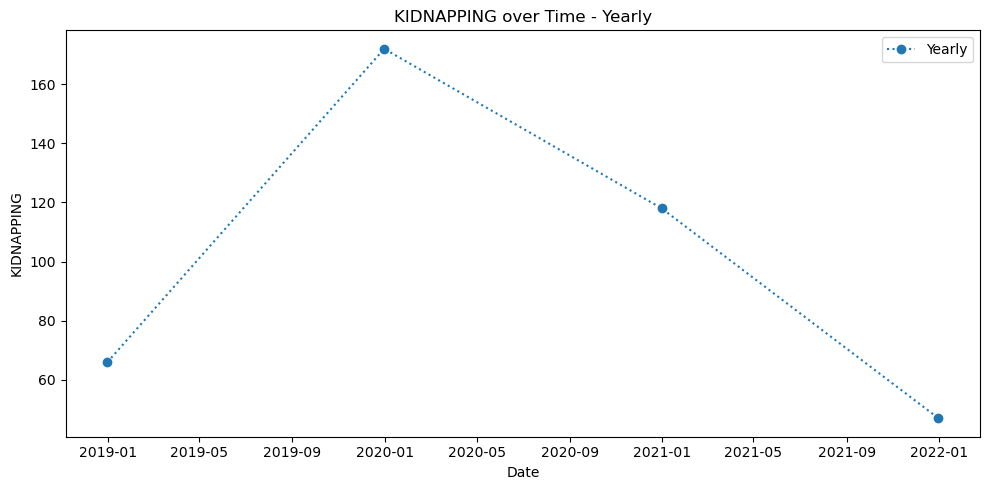

In [9]:
train['Date'] = pd.to_datetime(train.index)
train.set_index('Date', inplace=True)

data_weekly = train.resample('W').sum()
data_monthly = train.resample('M').sum()
data_yearly = train.resample('Y').sum()


columns = train.columns

for column in columns:
    plt.figure(figsize=(10, 5))
    plt.plot(train.index, train[column], label='Daily', linestyle='-', marker='o')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.title(f'{column} over Time - Daily')
    plt.legend()
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(data_weekly.index, data_weekly[column], label='Weekly', linestyle='--', marker='o')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.title(f'{column} over Time - Weekly')
    plt.legend()
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(data_monthly.index, data_monthly[column], label='Monthly', linestyle='-.', marker='o')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.title(f'{column} over Time - Monthly')
    plt.legend()
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(data_yearly.index, data_yearly[column], label='Yearly', linestyle=':', marker='o')
    plt.xlabel('Date')
    plt.ylabel(column)
    plt.title(f'{column} over Time - Yearly')
    plt.legend()
    plt.tight_layout()
    plt.show()


In [10]:
train

Primary Type,THEFT,BATTERY,ASSAULT,CRIMINAL DAMAGE,MOTOR VEHICLE THEFT,NARCOTICS,HOMICIDE,HUMAN TRAFFICKING,OFFENSE INVOLVING CHILDREN,KIDNAPPING
Date,,,,,,,,,,
2018-08-03,176,101,35,46,21,22,1,0,6,1
2018-08-04,241,201,62,87,34,34,4,0,4,0
2018-08-05,223,199,77,97,20,18,8,0,4,2
2018-08-06,215,130,52,74,26,35,3,0,7,0
2018-08-07,232,122,46,69,36,32,2,0,5,0
...,...,...,...,...,...,...,...,...,...,...
2021-07-14,102,102,59,80,27,7,2,0,4,0
2021-07-15,109,106,50,57,18,8,3,0,3,1
2021-07-16,128,117,68,86,35,7,2,0,4,0


train_size = int(len(df) * .5)
validate_size = int(len(df) * .3)
test_size = int(len(df) - train_size - validate_size)
validate_end_index = train_size + validate_size

# split into train, validation, test
train = df[: train_size]
validate = df[train_size : validate_end_index]
test = df[validate_end_index : ]

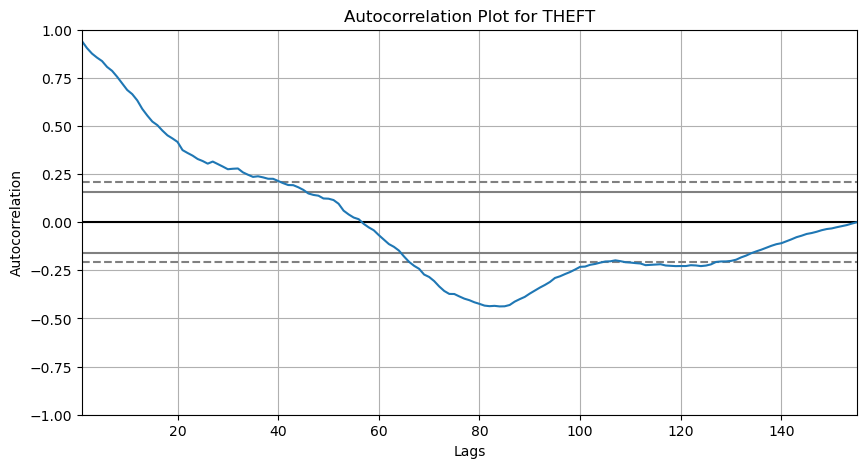

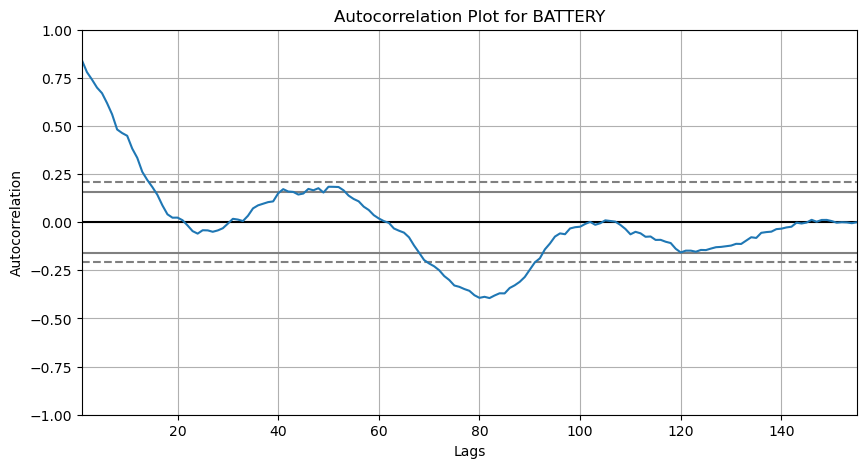

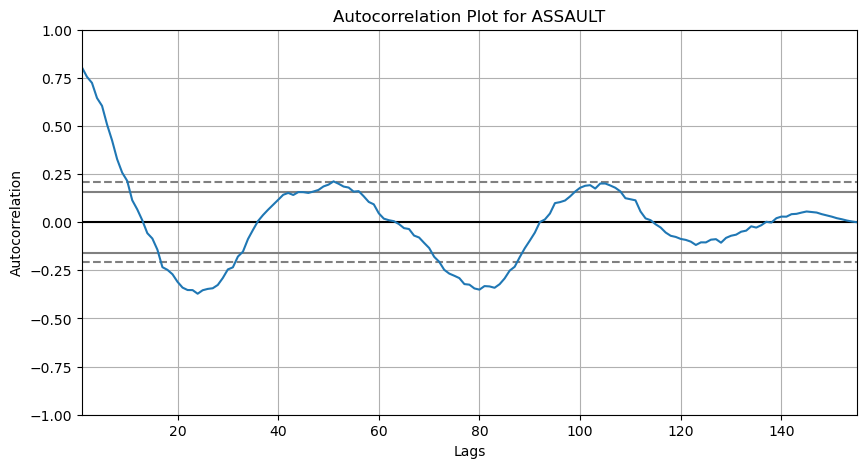

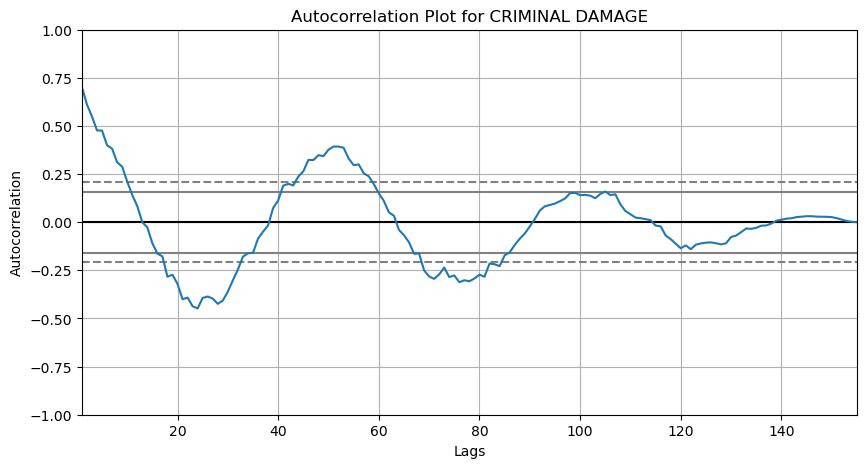

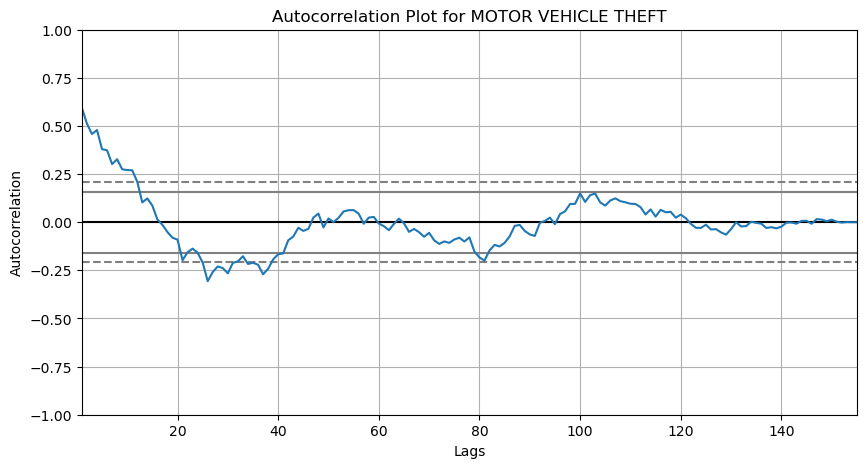

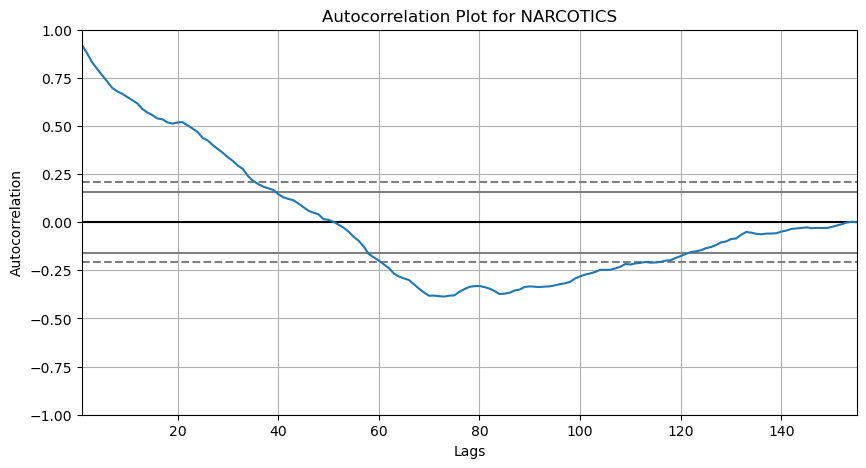

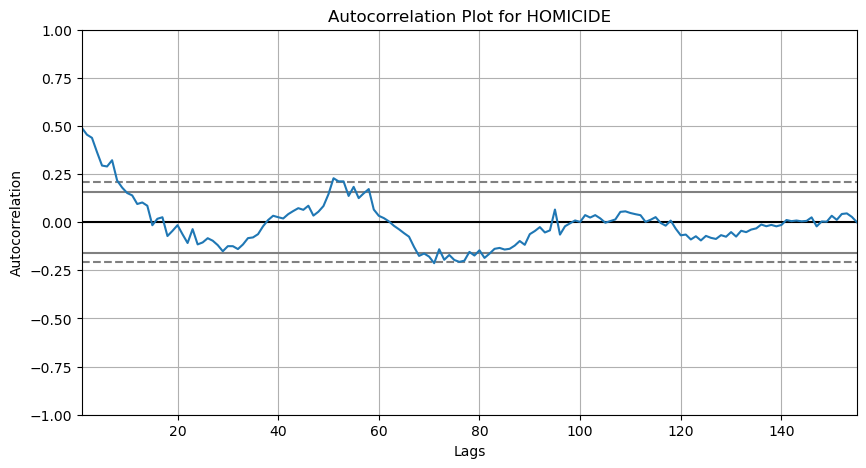

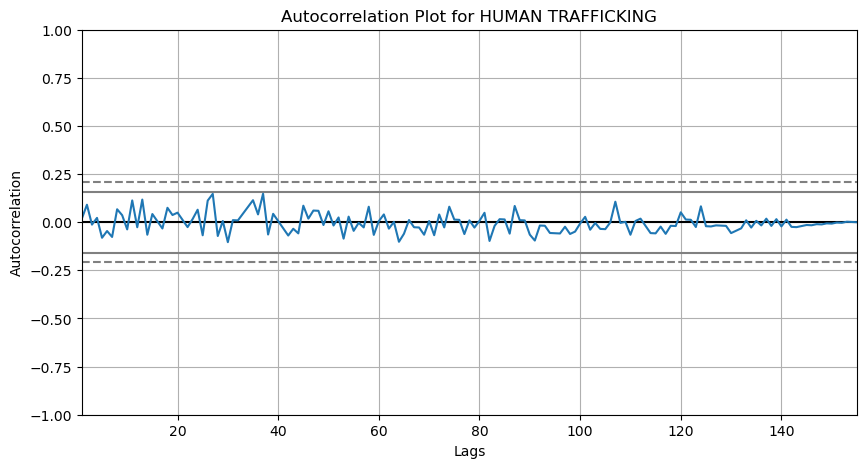

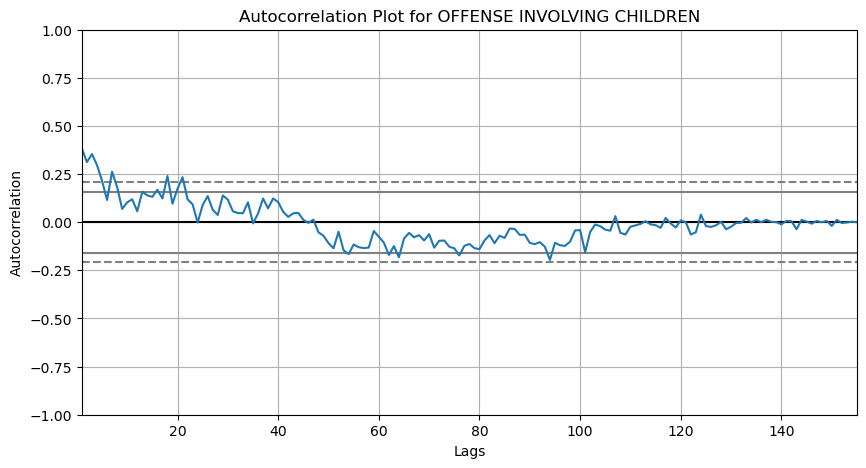

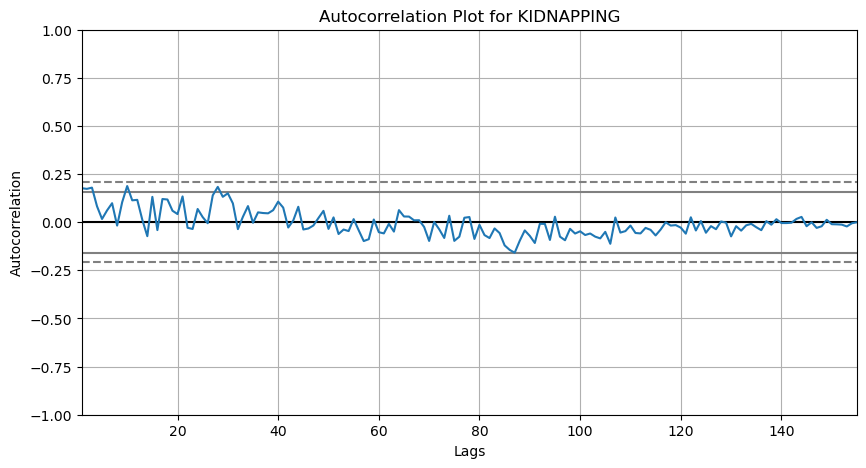

In [11]:
crime_types = ['THEFT', 'BATTERY', 'ASSAULT', 'CRIMINAL DAMAGE', 'MOTOR VEHICLE THEFT', 'NARCOTICS', 'HOMICIDE', 'HUMAN TRAFFICKING', 'OFFENSE INVOLVING CHILDREN', 'KIDNAPPING']

# Resample the data to daily frequency and calculate the mean for each crime type
train_resampled = train[crime_types].resample('W').mean()

# Loop through the crime types and create autocorrelation plots
for crime_type in crime_types:
    plt.figure(figsize=(10, 5))
    pd.plotting.autocorrelation_plot(train_resampled[crime_type])
    plt.xlabel("Lags")
    plt.ylabel("Autocorrelation")
    plt.title(f"Autocorrelation Plot for {crime_type}")
    plt.show()





BATTERY, ASSAULT, CRIMINAL DAMAGE have correlation wit time

HOMICIDE Lag: 35, 55, 75

In [12]:
lags = range(1, 366)



for lag in lags:
    train[f'BATTERY_Lag_{lag}'] = train['BATTERY'].shift(lag)

In [13]:
lags = range(1, 366)


for lag in lags:
    train[f'ASSAULT_Lag_{lag}'] = train['ASSAULT'].shift(lag)

In [14]:
lags = range(1, 366)


for lag in lags:
    train[f'CRIMINAL_DAMAGE_Lag_{lag}'] = train['CRIMINAL DAMAGE'].shift(lag)

In [15]:
lags = range(1, 366)


for lag in lags:
    train[f'HOMICIDE_Lag_{lag}'] = train['HOMICIDE'].shift(lag)

In [16]:
train

Primary Type,THEFT,BATTERY,ASSAULT,CRIMINAL DAMAGE,MOTOR VEHICLE THEFT,NARCOTICS,HOMICIDE,HUMAN TRAFFICKING,OFFENSE INVOLVING CHILDREN,KIDNAPPING,...,HOMICIDE_Lag_356,HOMICIDE_Lag_357,HOMICIDE_Lag_358,HOMICIDE_Lag_359,HOMICIDE_Lag_360,HOMICIDE_Lag_361,HOMICIDE_Lag_362,HOMICIDE_Lag_363,HOMICIDE_Lag_364,HOMICIDE_Lag_365
Date,,,,,,,,,,,,,,,,,,,,,
2018-08-03,176,101,35,46,21,22,1,0,6,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-04,241,201,62,87,34,34,4,0,4,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-05,223,199,77,97,20,18,8,0,4,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-06,215,130,52,74,26,35,3,0,7,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-07,232,122,46,69,36,32,2,0,5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-14,102,102,59,80,27,7,2,0,4,0,...,4.0,2.0,5.0,5.0,5.0,4.0,4.0,6.0,2.0,2.0
2021-07-15,109,106,50,57,18,8,3,0,3,1,...,2.0,4.0,2.0,5.0,5.0,5.0,4.0,4.0,6.0,2.0
2021-07-16,128,117,68,86,35,7,2,0,4,0,...,1.0,2.0,4.0,2.0,5.0,5.0,5.0,4.0,4.0,6.0


In [17]:
train = train.dropna()

In [18]:
train

Primary Type,THEFT,BATTERY,ASSAULT,CRIMINAL DAMAGE,MOTOR VEHICLE THEFT,NARCOTICS,HOMICIDE,HUMAN TRAFFICKING,OFFENSE INVOLVING CHILDREN,KIDNAPPING,...,HOMICIDE_Lag_356,HOMICIDE_Lag_357,HOMICIDE_Lag_358,HOMICIDE_Lag_359,HOMICIDE_Lag_360,HOMICIDE_Lag_361,HOMICIDE_Lag_362,HOMICIDE_Lag_363,HOMICIDE_Lag_364,HOMICIDE_Lag_365
Date,,,,,,,,,,,,,,,,,,,,,
2019-08-03,227,185,62,80,30,50,3,0,8,0,...,0.0,0.0,2.0,3.0,4.0,2.0,3.0,8.0,4.0,1.0
2019-08-04,224,199,59,89,34,42,2,0,3,0,...,1.0,0.0,0.0,2.0,3.0,4.0,2.0,3.0,8.0,4.0
2019-08-05,186,151,66,100,29,43,2,0,1,1,...,1.0,1.0,0.0,0.0,2.0,3.0,4.0,2.0,3.0,8.0
2019-08-06,177,142,62,87,25,49,0,1,5,0,...,1.0,1.0,1.0,0.0,0.0,2.0,3.0,4.0,2.0,3.0
2019-08-07,182,129,50,90,35,68,2,0,4,0,...,2.0,1.0,1.0,1.0,0.0,0.0,2.0,3.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-14,102,102,59,80,27,7,2,0,4,0,...,4.0,2.0,5.0,5.0,5.0,4.0,4.0,6.0,2.0,2.0
2021-07-15,109,106,50,57,18,8,3,0,3,1,...,2.0,4.0,2.0,5.0,5.0,5.0,4.0,4.0,6.0,2.0
2021-07-16,128,117,68,86,35,7,2,0,4,0,...,1.0,2.0,4.0,2.0,5.0,5.0,5.0,4.0,4.0,6.0


In [19]:
battery_train = ['BATTERY'] + [f'BATTERY_Lag_{lag}' for lag in range(1, 366)]

battery_train_df = train[battery_train].copy()


In [20]:
battery_train_df.head()

Primary Type,BATTERY,BATTERY_Lag_1,BATTERY_Lag_2,BATTERY_Lag_3,BATTERY_Lag_4,BATTERY_Lag_5,BATTERY_Lag_6,BATTERY_Lag_7,BATTERY_Lag_8,BATTERY_Lag_9,...,BATTERY_Lag_356,BATTERY_Lag_357,BATTERY_Lag_358,BATTERY_Lag_359,BATTERY_Lag_360,BATTERY_Lag_361,BATTERY_Lag_362,BATTERY_Lag_363,BATTERY_Lag_364,BATTERY_Lag_365
Date,,,,,,,,,,,,,,,,,,,,,
2019-08-03,185,141.0,127.0,123.0,130.0,161.0,198.0,185.0,136.0,133.0,...,196.0,178.0,137.0,147.0,125.0,122.0,130.0,199.0,201.0,101.0
2019-08-04,199,185.0,141.0,127.0,123.0,130.0,161.0,198.0,185.0,136.0,...,150.0,196.0,178.0,137.0,147.0,125.0,122.0,130.0,199.0,201.0
2019-08-05,151,199.0,185.0,141.0,127.0,123.0,130.0,161.0,198.0,185.0,...,142.0,150.0,196.0,178.0,137.0,147.0,125.0,122.0,130.0,199.0
2019-08-06,142,151.0,199.0,185.0,141.0,127.0,123.0,130.0,161.0,198.0,...,124.0,142.0,150.0,196.0,178.0,137.0,147.0,125.0,122.0,130.0
2019-08-07,129,142.0,151.0,199.0,185.0,141.0,127.0,123.0,130.0,161.0,...,139.0,124.0,142.0,150.0,196.0,178.0,137.0,147.0,125.0,122.0


In [21]:
criminal_damage_train = ['CRIMINAL DAMAGE'] + [f'CRIMINAL_DAMAGE_Lag_{lag}' for lag in range(1, 366)]

criminal_damage_train_df = train[criminal_damage_train].copy()


In [22]:
criminal_damage_train_df.head()

Primary Type,CRIMINAL DAMAGE,CRIMINAL_DAMAGE_Lag_1,CRIMINAL_DAMAGE_Lag_2,CRIMINAL_DAMAGE_Lag_3,CRIMINAL_DAMAGE_Lag_4,CRIMINAL_DAMAGE_Lag_5,CRIMINAL_DAMAGE_Lag_6,CRIMINAL_DAMAGE_Lag_7,CRIMINAL_DAMAGE_Lag_8,CRIMINAL_DAMAGE_Lag_9,...,CRIMINAL_DAMAGE_Lag_356,CRIMINAL_DAMAGE_Lag_357,CRIMINAL_DAMAGE_Lag_358,CRIMINAL_DAMAGE_Lag_359,CRIMINAL_DAMAGE_Lag_360,CRIMINAL_DAMAGE_Lag_361,CRIMINAL_DAMAGE_Lag_362,CRIMINAL_DAMAGE_Lag_363,CRIMINAL_DAMAGE_Lag_364,CRIMINAL_DAMAGE_Lag_365
Date,,,,,,,,,,,,,,,,,,,,,
2019-08-03,80,81.0,79.0,71.0,66.0,80.0,103.0,81.0,78.0,87.0,...,112.0,92.0,74.0,75.0,69.0,69.0,74.0,97.0,87.0,46.0
2019-08-04,89,80.0,81.0,79.0,71.0,66.0,80.0,103.0,81.0,78.0,...,77.0,112.0,92.0,74.0,75.0,69.0,69.0,74.0,97.0,87.0
2019-08-05,100,89.0,80.0,81.0,79.0,71.0,66.0,80.0,103.0,81.0,...,86.0,77.0,112.0,92.0,74.0,75.0,69.0,69.0,74.0,97.0
2019-08-06,87,100.0,89.0,80.0,81.0,79.0,71.0,66.0,80.0,103.0,...,79.0,86.0,77.0,112.0,92.0,74.0,75.0,69.0,69.0,74.0
2019-08-07,90,87.0,100.0,89.0,80.0,81.0,79.0,71.0,66.0,80.0,...,93.0,79.0,86.0,77.0,112.0,92.0,74.0,75.0,69.0,69.0


In [23]:
assault_train = ['ASSAULT'] + [f'ASSAULT_Lag_{lag}' for lag in range(1, 366)]

assault_train_df = train[assault_train].copy()

In [24]:
assault_train_df.head()

Primary Type,ASSAULT,ASSAULT_Lag_1,ASSAULT_Lag_2,ASSAULT_Lag_3,ASSAULT_Lag_4,ASSAULT_Lag_5,ASSAULT_Lag_6,ASSAULT_Lag_7,ASSAULT_Lag_8,ASSAULT_Lag_9,...,ASSAULT_Lag_356,ASSAULT_Lag_357,ASSAULT_Lag_358,ASSAULT_Lag_359,ASSAULT_Lag_360,ASSAULT_Lag_361,ASSAULT_Lag_362,ASSAULT_Lag_363,ASSAULT_Lag_364,ASSAULT_Lag_365
Date,,,,,,,,,,,,,,,,,,,,,
2019-08-03,62,57.0,59.0,48.0,60.0,62.0,56.0,56.0,67.0,56.0,...,67.0,66.0,66.0,49.0,63.0,46.0,52.0,77.0,62.0,35.0
2019-08-04,59,62.0,57.0,59.0,48.0,60.0,62.0,56.0,56.0,67.0,...,59.0,67.0,66.0,66.0,49.0,63.0,46.0,52.0,77.0,62.0
2019-08-05,66,59.0,62.0,57.0,59.0,48.0,60.0,62.0,56.0,56.0,...,67.0,59.0,67.0,66.0,66.0,49.0,63.0,46.0,52.0,77.0
2019-08-06,62,66.0,59.0,62.0,57.0,59.0,48.0,60.0,62.0,56.0,...,57.0,67.0,59.0,67.0,66.0,66.0,49.0,63.0,46.0,52.0
2019-08-07,50,62.0,66.0,59.0,62.0,57.0,59.0,48.0,60.0,62.0,...,72.0,57.0,67.0,59.0,67.0,66.0,66.0,49.0,63.0,46.0


### Lags needing captured of the 365

#### Assault:25, 80
#### Battery: 83
#### Criminal Damage: 25, 45, 75

In [25]:
def evaluate(target_var):
  
    rmse = round(sqrt(mean_squared_error(validate[target_var], yhat_df[target_var])), 0)
    return rmse


In [26]:
def plot_and_eval(target_var):
    
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label = 'Train', linewidth = 1)
    plt.plot(validate[target_var], label = 'Validate', linewidth = 1)
    plt.plot(yhat_df[target_var])
    plt.title(target_var)
    rmse = evaluate(target_var)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()
 

In [27]:
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])
eval_df


,model_type,target_var,rmse


In [28]:

def append_eval_df(model_type, target_var):
    
    rmse = evaluate(target_var)
    d = {'model_type': [model_type], 'target_var': [target_var], 'rmse': [rmse]}
    d = pd.DataFrame(d)
    return pd.concat([eval_df, d])


### MODELING ASSAULT

### LAST OBSERVED

In [46]:
target_col = 'ASSAULT' 
predictor_lag25_col = 'ASSAULT_Lag_25'  
predictor_lag80_col = 'ASSAULT_Lag_80'  

target = assault_train_df[target_col].shift(-365) 
predictor_lag25 = assault_train_df[predictor_lag25_col]
predictor_lag80 = assault_train_df[predictor_lag80_col]

predictors = pd.concat([predictor_lag25, predictor_lag80], axis=1)


target = target.dropna()
predictors = predictors.dropna()

min_samples = min(len(target), len(predictors))
target = target[:min_samples]
predictors = predictors[:min_samples]

target = target.dropna()


train_ratio = 0.8 
train_size = int(train_ratio * len(target))

train_target = target[:train_size]
train_predictors = predictors[:train_size]
test_target = target[train_size:]
test_predictors = predictors[train_size:]

model = LinearRegression()
model.fit(train_predictors, train_target)

predictions = model.predict(test_predictors)


mse = mean_squared_error(test_target, predictions)


metrics_df = pd.DataFrame({
    'Model': ['Last Observed Baseline'],
    'Target': 'ASSAULT',
    'RMSE': [mse]
})

metrics_df







,Model,Target,RMSE
0,Last Observed Baseline,ASSAULT,302.513852


### SIMPLE AVG

In [47]:
# Calculate the historical average of the assault counts for the simple average baseline
historical_average = target.mean()

# Create a list of historical average predictions for the test set (next year)
predictions_simple_avg = [historical_average] * len(test_target)

# Calculate Mean Squared Error (MSE) for the simple average baseline
mse_simple_avg = mean_squared_error(test_target, predictions_simple_avg)

# Append results to the existing metrics DataFrame
metrics_df = metrics_df.append({
    'Model': 'Simple Average Baseline',
    'Target': 'ASSAULT',
    'RMSE': mse_simple_avg
}, ignore_index=True)

In [48]:
metrics_df




,Model,Target,RMSE
0,Last Observed Baseline,ASSAULT,302.513852
1,Simple Average Baseline,ASSAULT,186.662696


### MOVING AVG

In [ ]:
period = 30

assaultlag25 = round(assault_train_df['ASSAULT_Lag_25'].rolling(period).mean()[-1], 2)

assaultlag80 = round(assault_train_df['ASSAULT_Lag_80'].rolling(period).mean()[-1], 2)

assaultlag365 = round(assault_train_df['ASSAULT_Lag_365'].rolling(period).mean()[-1], 2)


yhat_df = pd.DataFrame(
    {'ASSAULT': [assault],
     'ASSAULT_Lag_25': [assaultlag25],
    'ASSAULT_Lag_80': [assaultlag80],
    'ASSAULT_Lag_365' : [assaultlag365]},
    index=validate.index)

yhat_df.head(3)

#####  MODELING BATTERY

In [ ]:
selected_lag_columns = ['BATTERY_Lag_83']


X_train = battery_train_df[selected_lag_columns]

y_train = battery_train_df['BATTERY']

#####  MODELING CRIMINAL DAMAGE

In [ ]:
selected_lag_columns = ['CRIMINAL_DAMAGE_Lag_25', 'CRIMINAL_DAMAGE_Lag_45', 'CRIMINAL_DAMAGE_Lag_75']


X_train = criminal_damage_train_df[selected_lag_columns]

y_train = criminal_damage_train_df['CRIMINAL DAMAGE']